# Final Project

### 獲取歷史資料

In [1]:
import warnings
warnings.filterwarnings('ignore') #忽略錯誤訊息

In [2]:
from finlab.data import Data

data = Data()

close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")
#財務指標
pe = data.get("本益比")
PB = data.get("股價淨值比")
#
rev = data.get("當月營收")
l_rev = data.get("去年當月營收")

bargin_i=data.get("投信買賣超股數")
bargin_f=data.get("外資自營商買賣超股數")
bargin_s=data.get("自營商買賣超股數(自行買賣)")


rev.index = rev.index.shift(5, "d")

### 計算features

In [3]:
def bias(n):
    return close / close.rolling(n, min_periods=1).mean()

def acc(n):
    return close.shift(n) / (close.shift(2*n) + close) * 2

def rsv(n):
    l = close.rolling(n, min_periods=1).min()
    h = close.rolling(n, min_periods=1).max()
    
    return (close - l) / (h - l)

def mom(n):
    return (rev / rev.shift(1)).shift(n)

def yoy(n):
    return (rev / rev.shift(12)-1).shift(n)

#def revQ(n):
#    return (rev.shift(12)/1).shift(n)



features = {
    'mom0': mom(0),
    'mom1': mom(1),
    'mom2': mom(2),
    'mom3': mom(3),
    'mom4': mom(4),
    'mom5': mom(5),
    'mom6': mom(6),
    'mom7': mom(7),
    'mom8': mom(8),
    'mom9': mom(9),
    
#    'revQ': revQ(0),        #V
    
    'yoy': yoy(0),        #V

    'delta_yoy':yoy(0)-yoy(1),
    
    'bias5': bias(5),
    'bias10': bias(10),
    'bias20': bias(20),
    'bias60': bias(60),
    'bias120': bias(120),
    'bias240': bias(240),
    
    'acc5': acc(5),
    'acc10': acc(10),
    'acc20': acc(20),
    'acc60': acc(60),
    'acc120': acc(120),
    'acc240': acc(240),
    
    'rsv5': rsv(5),
    'rsv10': rsv(10),
    'rsv20': rsv(20),
    'rsv60': rsv(60),
    'rsv120': rsv(120),
    'rsv240': rsv(240),
} 

In [4]:
list1=list(features.keys())
list1 #確認找的feature清單

['mom0',
 'mom1',
 'mom2',
 'mom3',
 'mom4',
 'mom5',
 'mom6',
 'mom7',
 'mom8',
 'mom9',
 'yoy',
 'delta_yoy',
 'bias5',
 'bias10',
 'bias20',
 'bias60',
 'bias120',
 'bias240',
 'acc5',
 'acc10',
 'acc20',
 'acc60',
 'acc120',
 'acc240',
 'rsv5',
 'rsv10',
 'rsv20',
 'rsv60',
 'rsv120',
 'rsv240']

In [5]:
#features.get('delta_yoy').tail(50)

### 製作dataset

##### 設定買賣頻率

In [6]:
every_month = rev.index
every_month

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2021-12-15', '2022-01-15', '2022-02-15', '2022-03-15',
               '2022-04-15', '2022-05-15', '2022-06-15', '2022-07-15',
               '2022-08-15', '2022-09-15'],
              dtype='datetime64[ns]', name='date', length=212, freq=None)

##### 將dataframe 組裝起來

In [7]:
# features['bias20'].reindex(every_month, method='ffill')

for name, f in features.items():
    features[name] = f.reindex(every_month, method='ffill')

In [8]:

for name, f in features.items():
    features[name] = f.unstack()

In [9]:
import pandas as pd
dataset = pd.DataFrame(features)

In [10]:
dataset

mom0      mom1      mom2      mom3      mom4  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-05-15  0.678559  1.435387  1.209077  0.859901  0.729493   
         2022-06-15  0.917472  0.678559  1.435387  1.209077  0.859901   
         2022-07-15  1.694666  0.917472  0.678559  1.435387  1.209077   
         2022-08-15  0.641536  1.694666  0.917472  0.678559  1.435387   
         2022-09-15  1.280940  0.641536  1.694666  0.917472  0.678559   

                         mom5      mom6      mom7      mom8      mom9  ...  \
stock_id date                                                          ...   
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-03-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-04-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-05-15       NaN       NaN       NaN       NaN       NaN  ...   
         2005-06-15       NaN       NaN       NaN       NaN       NaN  ...   
...                       ...       ...       ...       ...       ...  ...   
9962     2022-05-15  1.238664  1.033162  1.428756  0.954852  0.618641  ...   
         2022-06-15  0.729493  1.238664  1.033162  1.428756  0.954852  ...   
         2022-07-15  0.859901  0.729493  1.238664  1.033162  1.428756  ...   
         2022-08-15  1.209077  0.859901  0.729493  1.238664  1.033162  ...   
         2022-09-15  1.435387  1.209077  0.859901  0.729493  1.238664  ...   

                        acc20     acc60    acc120    acc240      rsv5  \
stock_id date                                                           
0015     2005-02-15       NaN       NaN       NaN       NaN       NaN   
         2005-03-15       NaN       NaN       NaN       NaN       NaN   
         2005-04-15       NaN       NaN       NaN       NaN       NaN   
         2005-05-15       NaN       NaN       NaN       NaN       NaN   
         2005-06-15       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
9962     2022-05-15  1.294964  0.948454  1.244526  0.840673  0.375000   
         2022-06-15  0.915888  1.080182  1.255556  0.862342  0.000000   
         2022-07-15  1.037037  1.498258  0.880886  2.119145  0.454545   
         2022-08-15  0.883797  1.017857  1.031297  1.354003  1.000000   
         2022-09-15  1.038194  1.017964  0.946092  1.689861  0.333333   

                       rsv10     rsv20     rsv60    rsv120    rsv240  
stock_id date                                                         
0015     2005-02-15      NaN       NaN       NaN       NaN       NaN  
         2005-03-15      NaN       NaN       NaN       NaN       NaN  
         2005-04-15      NaN       NaN       NaN       NaN       NaN  
         2005-05-15      NaN       NaN       NaN       NaN       NaN  
         2005-06-15      NaN       NaN       NaN       NaN       NaN  
...                      ...       ...       ...       ...       ...  
9962     2022-05-15  0.12500  0.056075  0.118881  0.160000  0.423841  
         2022-06-15  0.00000  0.000000  0.000000  0.053333  0.351536  
         2022-07-15  0.73913  0.303571  0.097143  0.075556  0.062271  
         2022-08-15  1.00000  1.000000  0.820755  0.386667  0.386667  
         2022-09-15  0.25000  0.678571  0.772277  0.346667  0.346667  

[431844 rows x 30 columns]

In [11]:
feature_names = list(dataset.columns)

### 新增 label

In [12]:
from finlab import ml

ml.add_profit_prediction(dataset)
ml.add_rank_prediction(dataset)

### 刪除太大太小的歷史資料

In [13]:
print(dataset.shape)

def drop_extreme_case(dataset, feature_names, thresh=0.01):
    
    extreme_cases = pd.Series(False, index=dataset.index)
    for f in feature_names:
        tf = dataset[f]
        extreme_cases = extreme_cases | (tf < tf.quantile(thresh)) | (tf > tf.quantile(1-thresh))
    dataset = dataset[~extreme_cases]
    return dataset

dataset_drop_extreme_case = drop_extreme_case(dataset,list1, thresh=0.01)

print(dataset_drop_extreme_case.shape)

(431844, 32)
(377947, 32)


In [14]:
dataset_dropna = dataset_drop_extreme_case.dropna(how='any')
dataset_dropna = dataset_dropna.reset_index().set_index("date")

In [15]:
dataset_drop_extreme_case.index.get_level_values("date")

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2021-06-15', '2021-09-15', '2021-11-15', '2021-12-15',
               '2022-02-15', '2022-03-15', '2022-04-15', '2022-06-15',
               '2022-08-15', '2022-09-15'],
              dtype='datetime64[ns]', name='date', length=377947, freq=None)

In [16]:
dataset_train = dataset_dropna.loc[:'2020']
dataset_test = dataset_dropna.loc['2021':]

### 神經網路模型

In [17]:
import os

In [18]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers

os.environ['KMP_DUPLICATE_LIB_OK']='True'

model = keras.models.Sequential()
model.add(layers.Dense(100, activation='relu',
                      input_shape=(len(feature_names),),
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dense(100, activation='relu',
                      kernel_initializer=initializers.he_normal(seed=0)))
model.add(layers.Dropout(0.7))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()

model.compile(loss='mean_squared_error',
              optimizer="adam",)

print('start fitting')
history = model.fit(dataset_train[feature_names], dataset_train['rank'],
                    batch_size=1000, #1000
                    epochs=225, #225
                    verbose=1,
                    validation_split=0.1, )


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3100      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 13,301
Trainable params: 13,301
Non-trainable params: 0
_________________________________________________________________
start fitting
Epoch 1/225
138/138 [==============================] - ETA: 0s - loss: 0.187 - ETA: 0s - loss: 0.156 - ETA: 0s - loss: 0.126 - ETA: 0s - loss: 0.110 - ETA: 0s - loss: 0.101 - ETA: 0s - loss: 0.096 - ETA: 0s - loss: 0.093 - ETA: 0s - los

### 結果

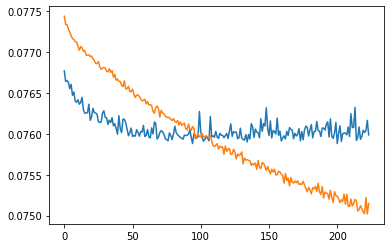

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['val_loss'][1:])
plt.plot(history.history['loss'][1:])

### lightgbm Model

In [20]:
import lightgbm as lgb
cf = lgb.LGBMRegressor(n_estimators=500)
cf.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

LGBMRegressor(n_estimators=500)

### Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestRegressor

cf2 = RandomForestRegressor(n_estimators=100)
cf2.fit(dataset_train[feature_names].astype(float), dataset_train['rank'])

RandomForestRegressor()

<AxesSubplot:xlabel='Value', ylabel='Feature'>

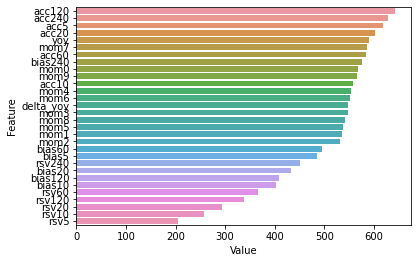

In [22]:
feature_imp = pd.DataFrame(zip(cf.feature_importances_, feature_names), 
                           columns=['Value','Feature']).sort_values('Value', ascending=False)
feature_imp

%matplotlib inline
import seaborn as sns
sns.barplot(x="Value", y="Feature", data=feature_imp)

### Ensemble learning

In [23]:
dataset_drop = dataset.dropna(subset=feature_names+['return'])

vals = model.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result1'] = pd.Series(vals.swapaxes(0,1)[0], dataset_drop.index)

vals = cf.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result2'] = pd.Series(vals, dataset_drop.index)

vals = cf2.predict(dataset_drop[feature_names].astype(float))
dataset_drop['result3'] = pd.Series(vals, dataset_drop.index)

dataset_drop = dataset_drop.reset_index().set_index("date")

In [24]:
#同學的問題 https://hahow.in/courses/5b9d3a6dca498a001e917383/discussions/5d689be485201d00221861b1?item=5c4c68d459ffe1002002f38b
import math

#新增本益比數據
pe = data.get("本益比")
pe=pe.reindex(every_month, method='ffill').fillna(method='ffill')#對應訓練資料集索引日期,fillna處理na數值

#date欄位
dates = sorted(list(set(dataset_test.index)))
rs = []
rs2 = []

for d in dates:
    dataset_time = dataset_test.loc[d]
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3']
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()
    
    #有人想加pe濾網
    pe_s=pe.loc[d]#帶入日期到本益比資料
    dataset_time=dataset_time[condition].reset_index()
    dataset_time=dataset_time.set_index('stock_id')
    dataset_time['pe']=pe_s
    dataset_time['pe_rank'] = dataset_time['pe'].rank(pct=True)#增加本益比排行欄位(百分比模式)
    dataset_time=dataset_time[dataset_time['pe_rank']<0.7]#找低本益比的前50%
    r2 = dataset_time['return'].mean()#本益比濾網報酬率
    
    #算報酬率
    rs.append(r * (1-3/1000-1.425/1000*2*0.6))
    rs2.append(r2 * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates).cumprod()
rs2 = pd.Series(rs2, index=dates).cumprod()

s0050 = close['0050']['2016':]

#繪圖
plt.rcParams["figure.figsize"] = (12,8)
pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), 
              'Include PE strategy return':rs2.reindex(s0050.index, method='ffill'), 
              '0050 return':s0050/s0050[0]}).plot()

KeyError: 'result1'

# backtest

<AxesSubplot:xlabel='date'>

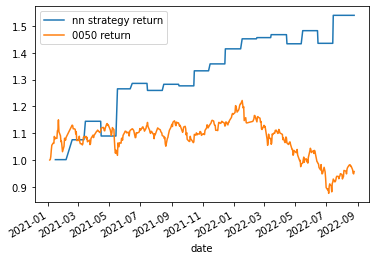

In [25]:
import math


dates = sorted(list(set(dataset_drop.index)))

rs = []
for d in dates:
    
    dataset_time = dataset_drop.loc[d]
    
    dataset_time = drop_extreme_case(dataset_time,list1, thresh=0.01)
    
    rank = dataset_time['result1'] + dataset_time['result2'] + dataset_time['result3'] 
    
    condition = (rank >= rank.nlargest(20).iloc[-1]) 
    r = dataset_time['return'][condition].mean()

    rs.append(r * (1-3/1000-1.425/1000*2*0.6))

rs = pd.Series(rs, index=dates)['2021':].cumprod()

s0050 = close['0050']['2021':]

pd.DataFrame({'nn strategy return':rs.reindex(s0050.index, method='ffill'), '0050 return':s0050/s0050[0]}).plot()



### 當月持股狀況

In [26]:
dataset.index.levels[1]

DatetimeIndex(['2005-02-15', '2005-03-15', '2005-04-15', '2005-05-15',
               '2005-06-15', '2005-07-15', '2005-08-15', '2005-09-15',
               '2005-10-15', '2005-11-15',
               ...
               '2021-12-15', '2022-01-15', '2022-02-15', '2022-03-15',
               '2022-04-15', '2022-05-15', '2022-06-15', '2022-07-15',
               '2022-08-15', '2022-09-15'],
              dtype='datetime64[ns]', name='date', length=212, freq=None)

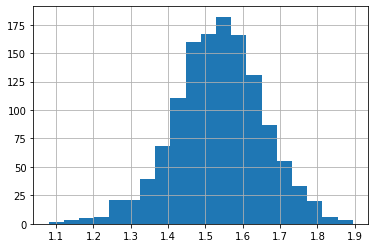

In [27]:
# get the latest dataset
last_date = "2022-09-15"#dataset.index.levels[1].max()
is_last_date = dataset.index.get_level_values('date') == last_date
last_dataset = dataset[is_last_date].copy()


last_dataset = drop_extreme_case(last_dataset,list1, thresh=0.01)


# remove NaN testcases
last_dataset = last_dataset.dropna(subset=feature_names)

# predict

vals = model.predict(last_dataset[feature_names].astype(float))
last_dataset['result1'] = pd.Series(vals.swapaxes(0,1)[0], last_dataset.index)

vals = cf.predict(last_dataset[feature_names].astype(float))
last_dataset['result2'] = pd.Series(vals, last_dataset.index)

vals = cf2.predict(last_dataset[feature_names].astype(float))
last_dataset['result3'] = pd.Series(vals, last_dataset.index)

# calculate score

rank = last_dataset['result1'] + last_dataset['result2'] + last_dataset['result3']
condition = (rank >= rank.nlargest(20).iloc[-1]) 

# plot rank distribution
rank.hist(bins=20)


# show the best 20 stocks
slist1 = rank[condition].reset_index()['stock_id']

# 平均分配資產於股票之中

In [28]:
close = data.get("收盤價")

money = 50000*6
stock_prices = close[rank[condition].reset_index()['stock_id']].iloc[-1]


print("股票平分張數:")
money / len(stock_prices) / stock_prices / 1000


股票平分張數:


stock_id
1325    0.551471
1465    1.127820
1503    0.238474
1612    0.864553
1720    0.309917
2427    1.102941
2474    0.083102
2597    0.165198
3380    0.480000
3479    0.226586
4535    0.404313
4541    0.492611
5215    0.342075
5243    0.217391
5403    0.208914
5525    0.622407
6263    0.190597
6285    0.177096
8046    0.054348
9939    0.198151
Name: 2022-08-25 00:00:00, dtype: float64